In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
m = 0.7
c = 0.3

X = np.arange(0,1,0.02)
y = m*X + c

print("Shape of X = ", X.shape)
print("Shape of y = ", y.shape)

Shape of X =  (50,)
Shape of y =  (50,)


In [15]:
split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40,) (40,)
(10,) (10,)


In [16]:
def plot_data(X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test, predictions=None):
    plt.figure(figsize=(10,8))
    
    plt.scatter(X_train, y_train, c = 'b', s=10, label = 'Training Data')
    plt.scatter(X_test, y_test, c = 'r', s=10, label = 'Testing Data')

    if predictions is not None:
        plt.scatter(X_test, predictions, c = 'g', s=10, label = 'Predicted Data')

    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.title("Scatter Plot of X and y")

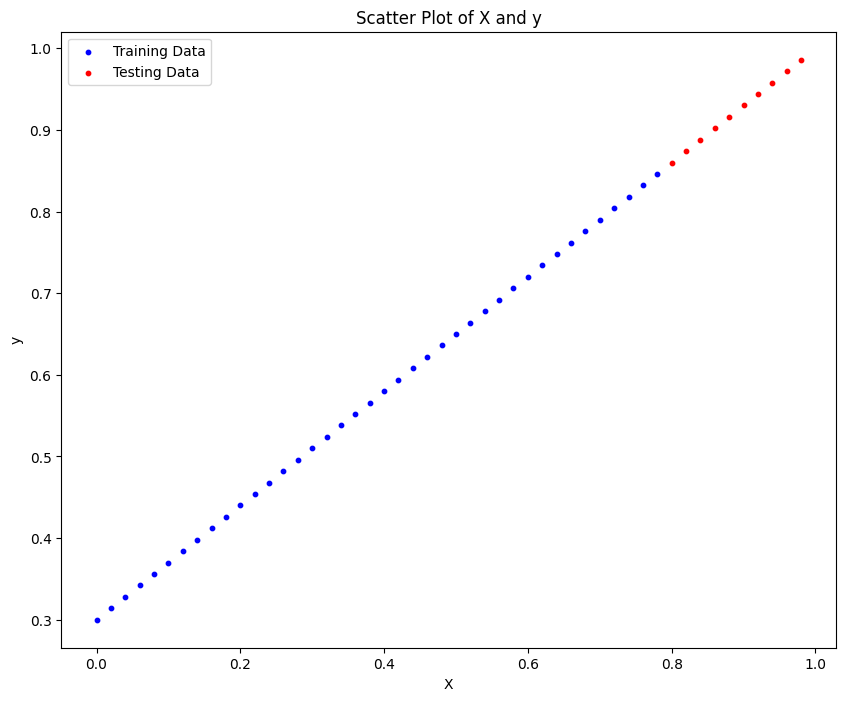

In [17]:
plot_data()

In [18]:
W = np.random.rand(1)
b = np.random.rand(1)
print(W,b)

[0.04925786] [0.94805016]


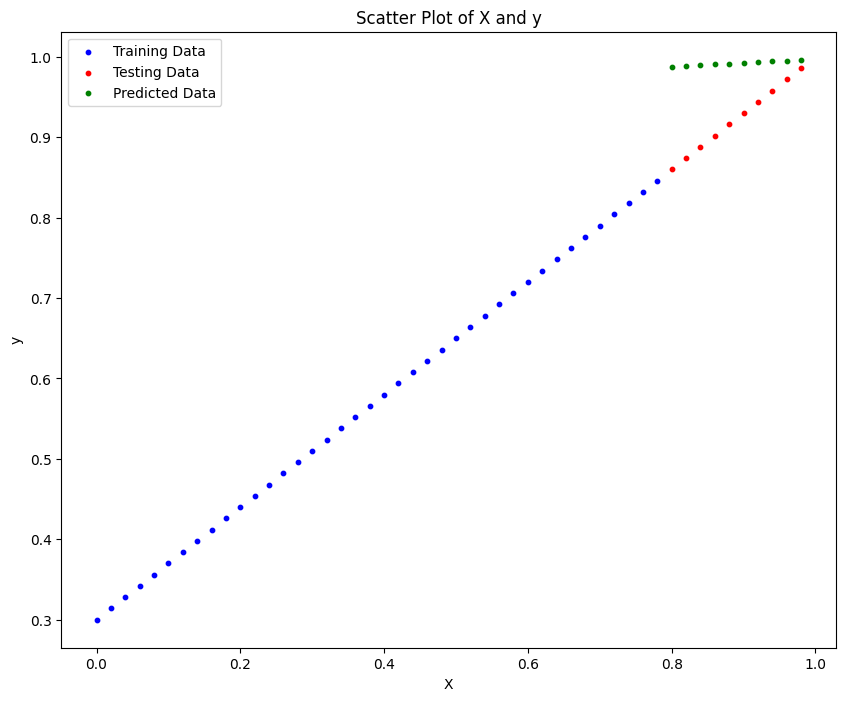

In [19]:
y_out = X_test*W + b
plot_data(predictions = y_out)

In [20]:
def loss_fn(y_true, y_pred):
    return np.sum(np.square(y_true-y_pred)) / len(y_true)

In [21]:
X_test.shape

(10,)

In [22]:
#Builidng the training loop

epochs = 1000
alpha = 0.1
trainLossList = []
testLossList = []
for epoch in range(epochs):
    #Forward pass
    y_pred = X_train * W + b

    #Compute train Loss
    train_loss = loss_fn(y_true=y_train, y_pred = y_pred)
    trainLossList.append(train_loss)

    #gradient computation
    gradientW = (-2 * np.sum((y_train - y_pred) *  X_train)) / len(y_train)
    gradientb = (-2 * np.sum(y_train - y_pred)) / len(X_train)

    #backPropagationErro
    W = W - (alpha * gradientW)
    b = b - (alpha * gradientb)

    #Magnitude Test Loss
    test_pred = X_test * W + b
    test_loss = loss_fn(y_true = y_test, y_pred = test_pred)
    testLossList.append(test_loss)

    if(epoch%10 == 0):
        print(f"Epoch : {epoch} | Train Loss : {train_loss:.5f} | Test Loss : {test_loss:.5f}")



Epoch : 0 | Train Loss : 0.17801 | Test Loss : 0.00247
Epoch : 10 | Train Loss : 0.02820 | Test Loss : 0.10182
Epoch : 20 | Train Loss : 0.02283 | Test Loss : 0.09699
Epoch : 30 | Train Loss : 0.01897 | Test Loss : 0.08146
Epoch : 40 | Train Loss : 0.01577 | Test Loss : 0.06778
Epoch : 50 | Train Loss : 0.01311 | Test Loss : 0.05635
Epoch : 60 | Train Loss : 0.01090 | Test Loss : 0.04684
Epoch : 70 | Train Loss : 0.00906 | Test Loss : 0.03894
Epoch : 80 | Train Loss : 0.00753 | Test Loss : 0.03237
Epoch : 90 | Train Loss : 0.00626 | Test Loss : 0.02691
Epoch : 100 | Train Loss : 0.00521 | Test Loss : 0.02237
Epoch : 110 | Train Loss : 0.00433 | Test Loss : 0.01860
Epoch : 120 | Train Loss : 0.00360 | Test Loss : 0.01546
Epoch : 130 | Train Loss : 0.00299 | Test Loss : 0.01285
Epoch : 140 | Train Loss : 0.00249 | Test Loss : 0.01069
Epoch : 150 | Train Loss : 0.00207 | Test Loss : 0.00888
Epoch : 160 | Train Loss : 0.00172 | Test Loss : 0.00739
Epoch : 170 | Train Loss : 0.00143 | Test 

In [23]:
W.shape

(1,)

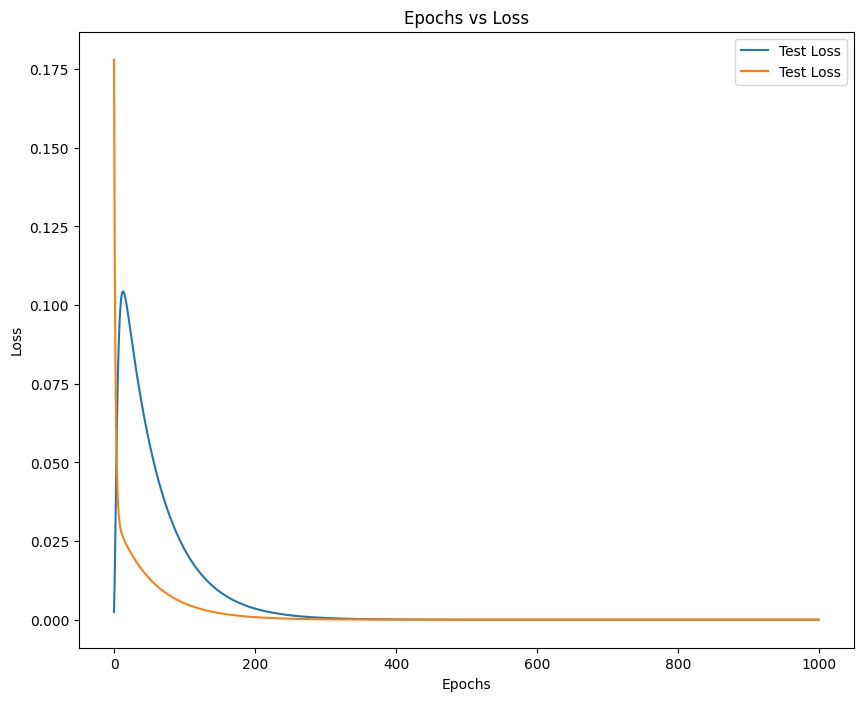

In [24]:
#Plot loss curve
plt.figure(figsize=(10,8))
plt.plot(range(epochs), testLossList, label = "Test Loss")
plt.plot(range(epochs), trainLossList, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epochs vs Loss")
plt.legend()